<a href="https://colab.research.google.com/github/Pranav210905/Inferial-Stastics/blob/main/ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANOVA-Analysis of the Variance**


*   Used to compare multiple means
*   It uses within sample mean of squares and between sample mean of squares

*   F stastic is used
*   HO :All means are same


*   H1:All are not same (Atleast one is different from other)






In [3]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import style
style.use('ggplot')
from  scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')


In [5]:
data=pd.read_csv('/content/drive/MyDrive/Drug.csv')
data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
data.nunique()

,0
Age,57
Sex,2
BP,3
Cholesterol,2
Na_to_K,198
Drug,5


In [8]:
data.BP.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

<Axes: xlabel='BP', ylabel='Na_to_K'>

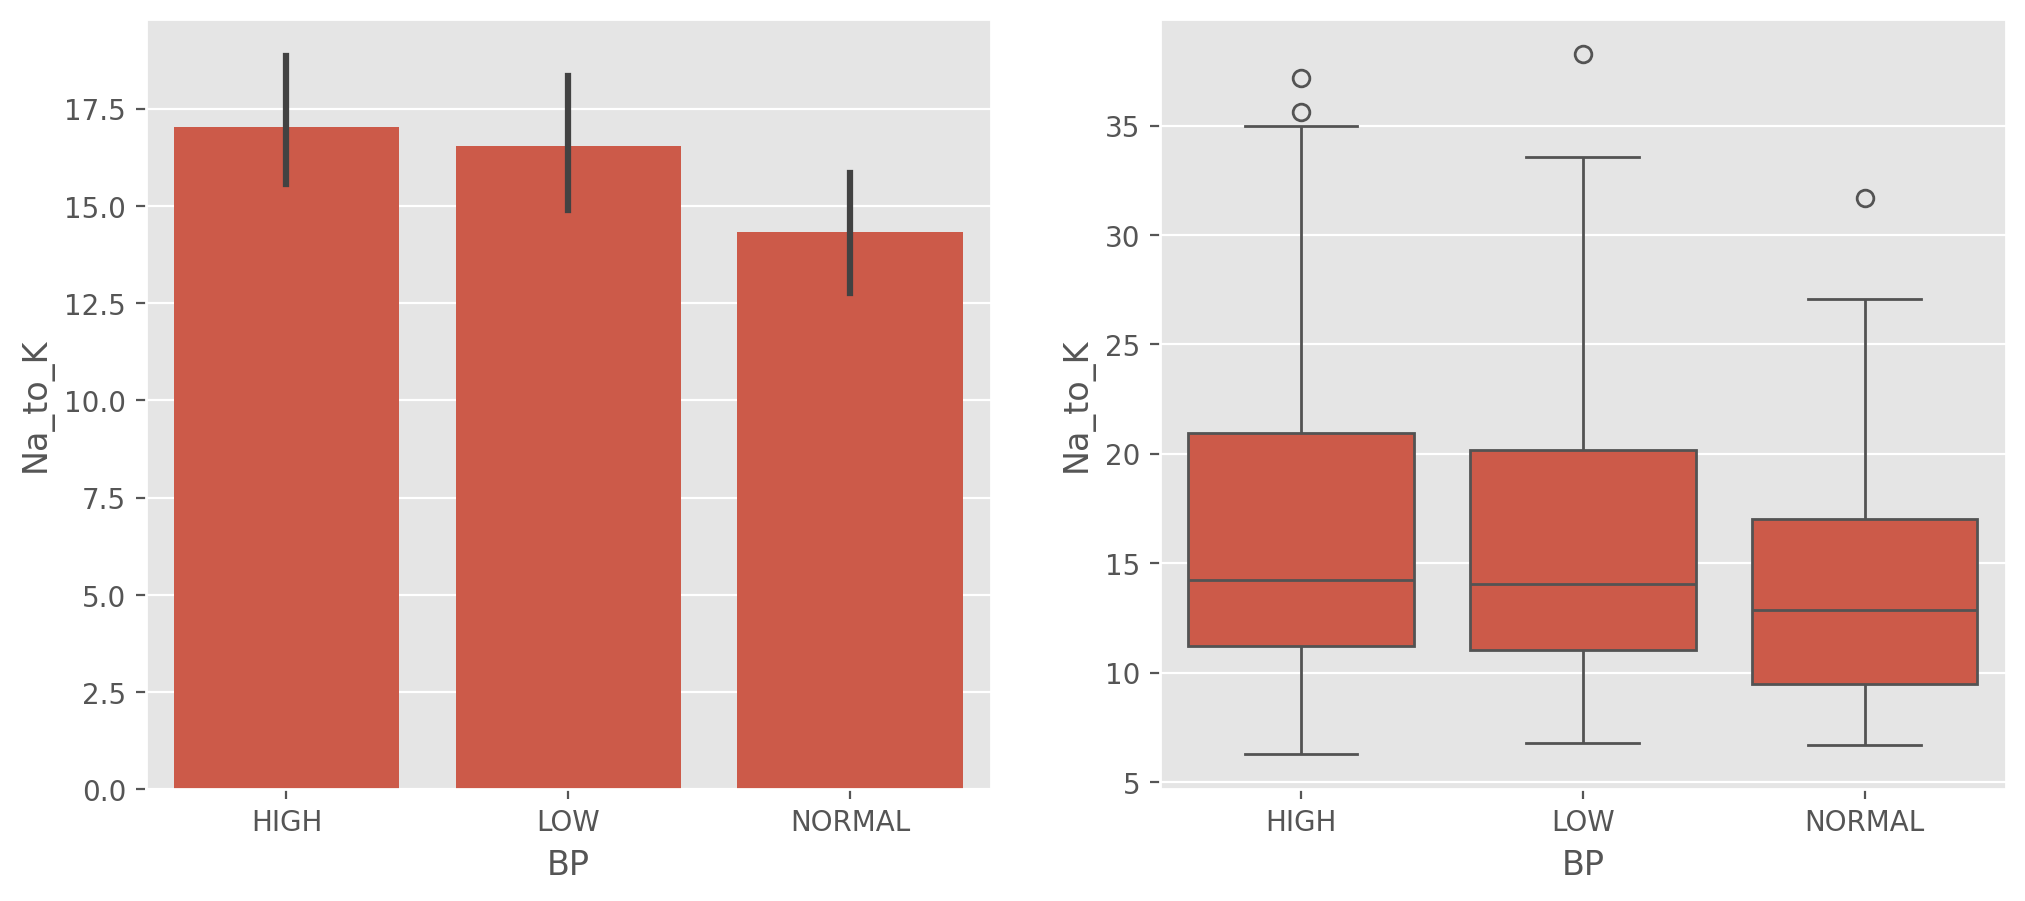

In [13]:
fig=plt.figure(figsize=(12,5),dpi=200)
fig.add_subplot(1,2,1)
sns.barplot(data=data,x='BP',y='Na_to_K')
fig.add_subplot(1,2,2)
sns.boxplot(x=data.BP,y=data.Na_to_K)

In [14]:
model=ols('Na_to_K ~ C(BP)',data=data).fit()

In [17]:
annova_table=sm.stats.anova_lm(model,typ=1)
annova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(BP),2.0,262.646894,131.323447,2.555821,0.080201
Residual,197.0,10122.274268,51.382103,NaN,NaN


In [23]:
df1=annova_table.df[0]
df2=annova_table.df[1]
f_stat_value=annova_table.F[0]
df1,df2

(2.0, 197.0)

In [24]:
alpha=0.05
f_critical=stats.f.ppf(1-alpha,df1,df2)
f_critical

3.041753029984693

In [25]:
if(f_stat_value>f_critical):
  print("Reject the null hypothesis")
else:
  print("Cannot Reject the null Hypothesis")

Cannot Reject the null Hypothesis
